### Example of how to use the LDSAnalysis class

In [1]:
from pathlib import Path
from dotenv import load_dotenv
import os

from analysis import LDSAnalysis
from plotting import plot_divergence_curves

load_dotenv('.env')  # Make sure this exists and has the correct path to the data 'PATH_DATA_ROOT'

True

#### Data must be structured as follows:
PATH_DATA_ROOT
├── P001
│   ├── PRE
│   │   ├── foot_right.csv
│   │   ├── thigh_left.csv
│   │   ├── ...
│   ├── POST
│   │   ├── foot_right.csv
│   │   ├── ...
├── P002
│   ├── ...

In [2]:
PATH_DATA_ROOT = os.environ.get('PATH_DATA_ROOT')
if PATH_DATA_ROOT is None:
    raise ValueError("The PATH_DATA_ROOT environment variable must be set.")
path_data_in = Path(PATH_DATA_ROOT).joinpath('processed')
path_data_out = Path(PATH_DATA_ROOT).joinpath('analysis')

In [3]:
sensor_location = 'foot_right'

In [4]:
analysis = LDSAnalysis(path_data_in=path_data_in,
                       path_data_out=path_data_out,
                       sensor_location=sensor_location)

#### Print a summary of the analysis object

In [5]:
analysis.summary()

################################################################################
Running stability analysis for foot_right
Participants: ['RE01', 'RE02', 'RE04', 'RE05', 'RE07', 'RE08', 'RE09', 'RE10', 'RE11', 'RE12', 'RE13', 'RE14', 'RE15', 'RE16', 'RE17', 'RE18', 'RE19', 'RE20', 'RE21', 'RE22', 'RE23']
Conditions: ['shoe1', 'shoe2', 'shoe3', 'shoe4', 'shoe5', 'shoe6']
Force recalculate: False
Path data in: C:\Users\dominik.fohrmann\OneDrive - MSH Medical School Hamburg - University of Applied Sciences and Medical University\Dokumente\Projects\bisp_footwear\data\imu\processed
Path data out: C:\Users\dominik.fohrmann\OneDrive - MSH Medical School Hamburg - University of Applied Sciences and Medical University\Dokumente\Projects\bisp_footwear\data\imu\analysis
Time delay: 27
Embedding dimension: 9
################################################################################


Store the signal data in a pandas DataFrame (pickle file) for time efficiency.
This is automatically done when running the successive steps of the analysis.

In [6]:
analysis.make_signals()

Computing signals from participants
Trial does not exist: shoe2. The file foot_right.csv does not exist for participant RE16 trial shoe2.
Trial does not exist: shoe4. The file foot_right.csv does not exist for participant RE21 trial shoe4.
Trial does not exist: shoe1. The file foot_right.csv does not exist for participant RE22 trial shoe1.
Trial does not exist: shoe4. The file foot_right.csv does not exist for participant RE23 trial shoe4.


Compute the time delay for the signal data based on the minimum of the average mutual information. The results for all trials are stored in the `time_delays` (pandas.DataFrame) property of the analysis object.

In [7]:
analysis.compute_time_delays()  # trigger the computation of the time delay
analysis.time_delay_summary()  # print a summary for reporting and debugging
tau = analysis.time_delay  # gets the average time delay over all participants, conditions, and axes
print(f'{tau=}')

Computing time delays
Time delays: 
x=31.15 +/- 10.15 
y=21.55 +/- 5.93 
z=29.55 +/- 5.73
Time delay: 27
tau=27


Compute the embedding dimension for the signal data with the given time delay. If the call to `compute_time_delays` wasn't made, it's automatically performed by this method. The results for all trials are stored in the `embedding_dimensions` (pandas.DataFrame) property of the analysis object.

In [8]:
analysis.compute_embedding_dimensions()  # trigger the computation of the embedding dimension
analysis.embedding_dimension_summary()  # print a summary for reporting and debugging
dE = analysis.embedding_dimension  # gets the maximum embedding dimension over all participants and conditions
print(f'{dE=}')

Computing embedding dimensions
dE_max=9
dE_mean=6.1
dE_std=0.4
Embedding dimension: 9
dE=9


Reconstruct the state spaces of the signals given the computed time delay and embedding dimension. If the calls to `compute_time_delays` and `compute_embedding_dimensions` weren't made, they're automatically performed by this method. The results for all trials are stored in the `state_spaces` (pandas.DataFrame) property of the analysis object.

In [9]:
analysis.compute_state_spaces()  # trigger the computation of the state spaces
state_spaces = analysis.state_spaces  # gets the state spaces for all participants and conditions

Computing state spaces


Compute the divergence curves for the state spaces. Automatically performs the previous steps if they weren't already done. The results for all trials are stored in the `divergence_curves` (pandas.DataFrame) property of the analysis object.

In [10]:
analysis.compute_divergence_curves()  # trigger the computation of the divergence curves
divergence_curves = analysis.divergence_curves  # gets the divergence curves for all participants and conditions

Use the divergence curves object and pass it to the  for the state spaces. The plot is saved in the `path_data_out` directory.

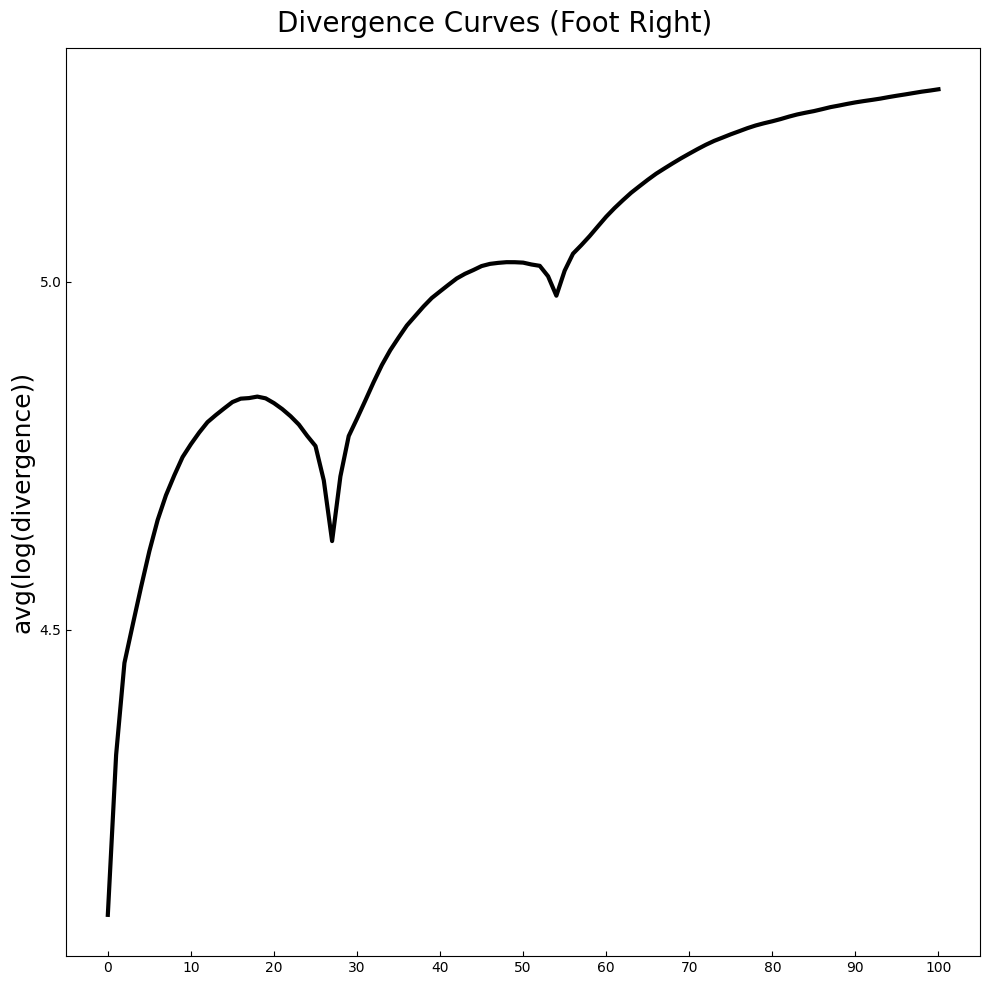

In [11]:
plot_divergence_curves(divergence_curves=analysis.divergence_curves,
                       path_data_out=path_data_out,
                       location_string='Foot Right')

Detect the region of rapid divergence and determine the number of sample to fit the line through for the LDS. Then set it via the `set_fit_interval()` method. Now, the maximum divergence exponent, a.k.a. local dynamic stability, can be computed.

In [ ]:
analysis.set_fit_interval(end=30)  # start=0 per default
analysis.compute_lds()